In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import scipy.stats as sps
from scipy.special import ndtr

#### 1) Сгенерировать $\theta \in \mathcal{U}(-10, 10)$

In [2]:
teta = np.random.uniform(-10, 10)
teta
n=1000
N=10000

#### 2) Сгенерировать выборку $X_{1}, ..., X_{1000} \sim Cauchy(\theta)$

#### $$\mathcal p_{\theta}(x) = \frac{1}{\pi (1+(x-\theta)^{2})}$$

In [3]:
X = sps.cauchy.rvs(loc=teta, scale=1, size=n, random_state = 42)
X.shape

(1000,)

#### 3) Найти выборочную медиану $\hat \theta$ и выборочное среднее $\overline{X}$

In [4]:
medX = np.median(X)
meanX = np.mean(X)
medX, meanX

(-2.4658075858183217, -1.4530032463576572)

#### 4) Проделать 2-3 еще 100 раз получив набор из 101 значения выборочной медианы и 101 значения выборочного среднего

In [5]:
X = np.array([sps.cauchy.rvs(loc=teta, scale=1, size=n) for _ in range (N+1)])
medX = np.median(X, axis = 1) 
meanX = np.mean(X, axis = 1)
medX, meanX
None

#### 5-6) Построить гистограммe по 101 полученному значению величины $\hat \theta$ и $\overline{X}$   и провести вертикальную линию соответствующую значению $\theta$

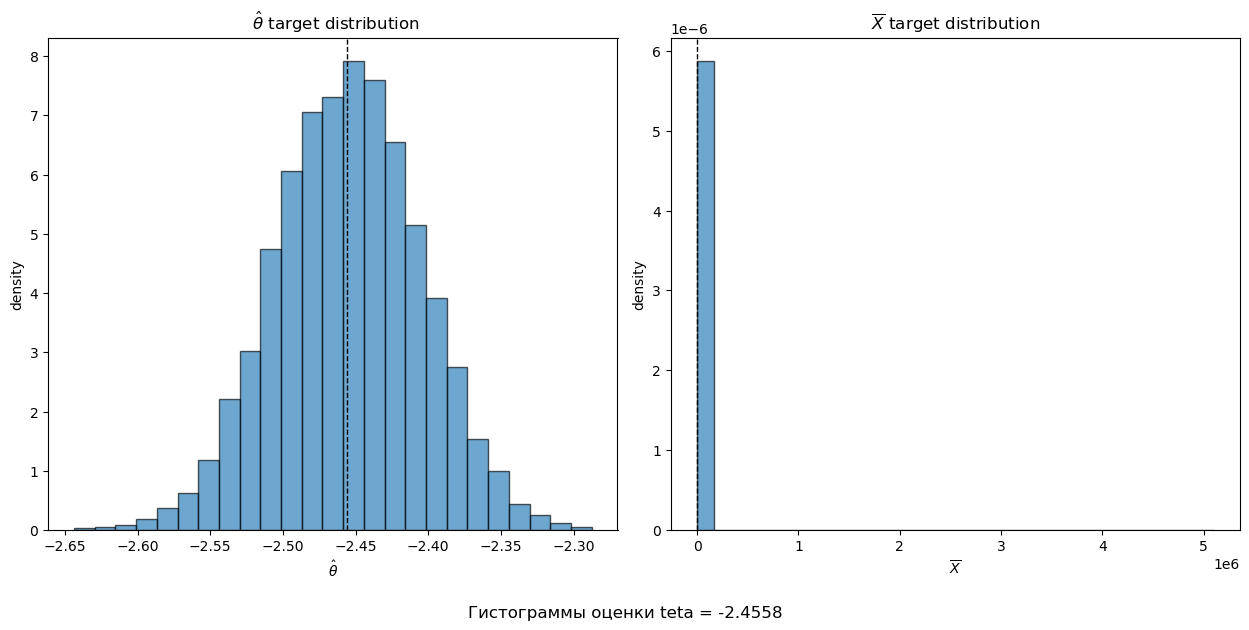

In [6]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(14,7))

ax0.hist(medX, bins = 25, edgecolor='black', density=True, alpha =0.65)
# ax0.hist([teta]*101, bins = 15, density=True)
ax0.axvline(teta, color='k', linestyle='dashed', linewidth=1)
ax0.set_ylabel('density')
ax0.set_xlabel(r'$\hat \theta$')
ax0.set_title(r' $\hat \theta$ target distribution')
# min_ylim, max_ylim = ax1.ylim()
# ax0.text(teta, 10*0.9, 'teta: {:.2f}'.format(teta))

ax1.hist(meanX, bins =30, edgecolor='black', density=True, alpha =0.65)
ax1.axvline(teta, color='k', linestyle='dashed', linewidth=1)
ax1.set_ylabel('density')
ax1.set_xlabel(r'$\overline{X}$')
ax1.set_title(r'$\overline{X}$ target distribution')

f.suptitle('Гистограммы оценки teta = {:.4f}'.format(teta), y=0.035)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

In [8]:
np.var(medX), np.var(meanX)

(0.0024892884027752646, 2604692365.423943)

#### 7) Сделать выводы, о том какая оценка статистика лучше оценивает параметр $\theta$

* Очевидно $\hat \theta$

#### 8) Повторите 1-7 еще 2 раза

Перезапусти клетки еще 2 раза

#### 9) Привести теоретическое объяснение результатов, полученных в ходе численного эксперимента

* $\theta$ = med of Cauchy($\theta$), $\hat \theta \overset{п.н}{\to} \theta$
* У Cauchy($\theta$) $\nexists{ EX}$

#### 10.1) Является ли $\hat\theta$ состоятельной? Получить ответ аналитически. Подтвердите аналитические расчеты с помощью построенной выше гистограммы.

* $\theta$ = mod of Cauchy($\theta$), $\hat \theta \overset{п.н}{\to} \theta$, Да, является

####  11.1)Является ли $\hat \theta$ ассимтотически нормальной?. Получить ответ аналитически.Подтвердить аналитические расчеты с помощь построения вспомогательной гистограммы по 101 значению величины $\sqrt{n}(\hat\theta -\theta)$

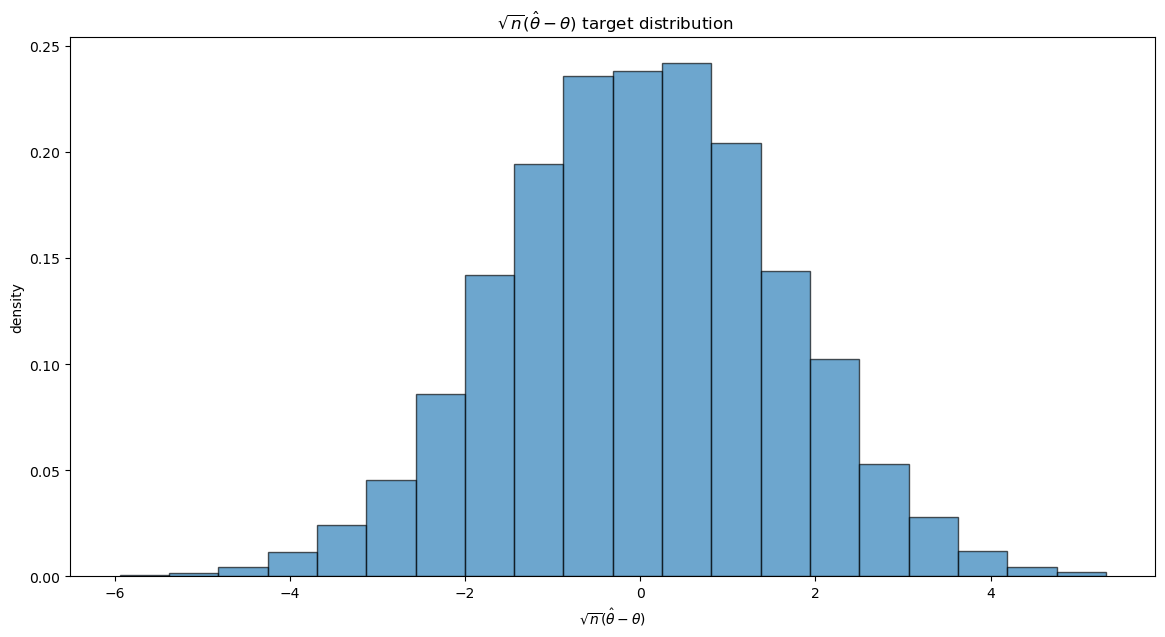

In [10]:
scaledMedX = np.sqrt(n)*(medX-teta)
f, (ax1) = plt.subplots(1, 1, figsize=(14,7))
ax1.hist(scaledMedX, bins = 20, edgecolor='black', density=True, alpha =0.65)
# ax0.hist([teta]*101, bins = 15, density=True)
# ax1.axvline(teta, color='k', linestyle='dashed', linewidth=1)
ax1.set_ylabel('density')
ax1.set_xlabel(r'$\sqrt{n}(\hat\theta -\theta)$')
ax1.set_title(r' $\sqrt{n}(\hat\theta -\theta)$ target distribution')
None

#### 10.2)  Является ли $\overline{X}$ состоятельной? Получить ответ аналитически. Подтвердите аналитические расчеты с помощью построенной выше гистограммы.

* Нет, не является, видно из гистограммы

####  11.2)Является ли $\overline{X}$ ассимтотически нормальной?. Получить ответ аналитически.Подтвердить аналитические расчеты с помощь построения вспомогательной гистограммы по 101 значению величины $\sqrt{n}(\overline{X} -\theta)$

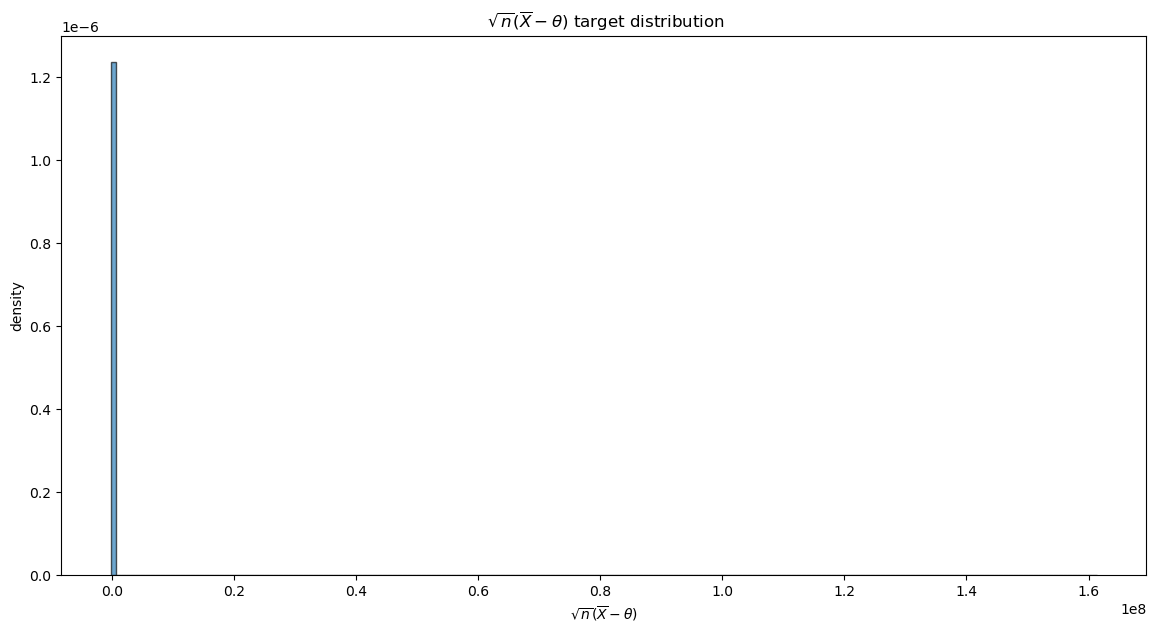

In [14]:
scaledMeanX = np.sqrt(n)*(meanX-teta)
f, (ax1) = plt.subplots(1, 1, figsize=(14,7))
ax1.hist(scaledMeanX, bins = 200, edgecolor='black', density=True, alpha =0.65)
# ax0.hist([teta]*101, bins = 15, density=True)
# ax1.axvline(teta, color='k', linestyle='dashed', linewidth=1)
ax1.set_ylabel('density')
ax1.set_xlabel(r'$\sqrt{n}(\overline{X} -\theta)$')
ax1.set_title(r' $\sqrt{n}(\overline{X} -\theta)$ target distribution')
None

In [13]:
np.var(scaledMeanX)

2604692365423.9434